Epoch 1/50
7/7 [==============================] - 1s 148ms/step - loss: 0.1726 - val_loss: 0.1712
Epoch 2/50
7/7 [==============================] - 0s 11ms/step - loss: 0.1693 - val_loss: 0.1671
Epoch 3/50
7/7 [==============================] - 0s 10ms/step - loss: 0.1654 - val_loss: 0.1619
Epoch 4/50
7/7 [==============================] - 0s 11ms/step - loss: 0.1601 - val_loss: 0.1549
Epoch 5/50
7/7 [==============================] - 0s 10ms/step - loss: 0.1533 - val_loss: 0.1457
Epoch 6/50
7/7 [==============================] - 0s 10ms/step - loss: 0.1443 - val_loss: 0.1339
Epoch 7/50
7/7 [==============================] - 0s 11ms/step - loss: 0.1334 - val_loss: 0.1199
Epoch 8/50
7/7 [==============================] - 0s 10ms/step - loss: 0.1221 - val_loss: 0.1062
Epoch 9/50
7/7 [==============================] - 0s 10ms/step - loss: 0.1127 - val_loss: 0.0969
Epoch 10/50
7/7 [==============================] - 0s 11ms/step - loss: 0.1086 - val_loss: 0.0930
Epoch 11/50
7/7 [===========

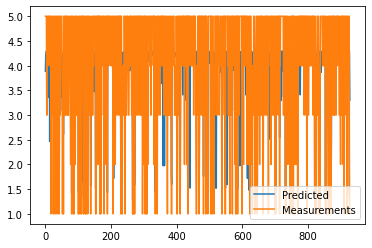

In [1]:
import pandas as pd
from keras.layers.core import Dense
from keras.models import Sequential
from keras.layers import LSTM
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#Data loading
df = pd.read_csv('/content/drive/My Drive/git/training_data.csv', index_col=None)
#Preparing database
df = df[['Vgas', 'Ang', 'Vgas2', 'ID', 'Vwater']]
#Preparing input data
input = df[['Ang', 'ID', 'Vwater']]
#Preparing label data
label = df['Vgas2']

# conversion to numpy array
x, y = input.values, label.values

# scaling values for model
x_scale = MinMaxScaler()
y_scale = MinMaxScaler()

X = x_scale.fit_transform(x)
Y = y_scale.fit_transform(y.reshape(-1,1))

# splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
X_train = X_train.reshape((-1, 1, 3))
X_test = X_test.reshape((-1, 1, 3))

# creating model using Keras
model = Sequential()
model.add(LSTM(units=30, return_sequences=True, input_shape=(1, 3)))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=30))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam')

model.fit(X_train, y_train, batch_size=250, epochs=50, validation_split=0.1, verbose=1)

score = model.evaluate(X_test, y_test)
print('Score: {}'.format(score))
y_predicted = model.predict(X_test)
y_predicted = y_scale.inverse_transform(y_predicted)
y_test = y_scale.inverse_transform(y_test)
plt.plot(y_predicted, label='Predicted')
plt.plot(y_test, label='Measurements')
plt.legend()
plt.show()
